Importing modules

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functions import *
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import matthews_corrcoef

Reading csv's

In [54]:
test = pd.read_csv("CSV/data_test.csv")
train = pd.read_csv("CSV/data_train.csv")
print(test.shape)
print(train.shape)

(16281, 15)
(32561, 15)


Merging csv's

In [55]:
df = pd.concat([test, train])
print(df.shape)
print(df.columns)

(48842, 15)
Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')


Exploring the data

Exploring numerical data

In [56]:
# numerical_columns = ["age","fnlwgt","capital-loss","capital-gain","hours-per-week","income"]
# sns.heatmap(data=df[numerical_columns].corr(),cmap="RdYlGn", annot=True, vmin=-1)

Dropping columns based on findings

In [57]:
# df = df.drop(["fnlwgt"], axis=1)
# df.reset_index(drop=True, inplace=True)

Exploring data - plotting everything vs target

In [58]:
# feature_columns = df.columns[:-5]
# print(feature_columns)
# for feature_column in feature_columns:
#     df1 = df[[feature_column, "income"]].pivot(columns="income", values=feature_column)
#     df1.columns = ["<=50K", ">50k"]
#     df1.plot.hist(stacked=True, bins=np.arange(df[feature_column].min()-0.5,df[feature_column].max()+1))
#     plt.xticks(np.arange(df[feature_column].min(), df[feature_column].max()+1))
#     plt.xlabel(feature_column)
#     plt.title(f"Comparing income to {feature_column}")
#     plt.show()

Performing train_test_split

In [59]:
y_train = train["income"].values
X_train_unnormalized = train.drop(["income"], axis=1).values

y_test = test["income"].values
X_test_unnormalized = test.drop(["income"], axis=1).values

# Checking baseline accuracy with RandomForestClassifier-model

Score on training set: 0.9999692884125181
Score on test set: 0.8529574350469873

cross_validation_score:
Accuracy: 85.80% (+/- 0.42)

classification_report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.91     12435
           1       0.73      0.61      0.66      3846

    accuracy                           0.85     16281
   macro avg       0.81      0.77      0.78     16281
weighted avg       0.85      0.85      0.85     16281


matthews_corrcoef:
0.5714334077189942


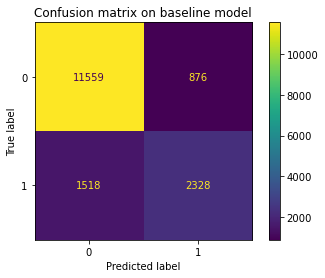

In [60]:
forest_baseline = RandomForestClassifier(random_state=42).fit(X_train_unnormalized, y_train)
predicting_scoring_model(forest_baseline, X_train_unnormalized,
                                         y_train, X_test_unnormalized,
                                         y_test, "baseline model")

# Modeling with normalized data.
Scaling the data

In [61]:
X_train = normalizing_array(X_train_unnormalized)
X_test = normalizing_array(X_test_unnormalized)

Score on training set: 0.8013267405792205
Score on test set: 0.7963270069406057

cross_validation_score:
Accuracy: 79.66% (+/- 0.81)

classification_report:
              precision    recall  f1-score   support

           0       0.79      0.99      0.88     12435
           1       0.88      0.16      0.27      3846

    accuracy                           0.80     16281
   macro avg       0.84      0.58      0.58     16281
weighted avg       0.81      0.80      0.74     16281


matthews_corrcoef:
0.3207212304413108


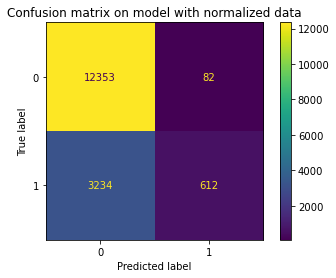

In [62]:
forest_normal = RandomForestClassifier(random_state=42).fit(X_train, y_train)
predicting_scoring_model(forest_normal, X_train, y_train, X_test,
                                         y_test, "model with normalized data")

# Building on the baseline model with RandomizedSearchCV

In [ ]:
param_grid = {
    "n_estimators": [100,200,300,400,500],
    "max_features": ["auto","sqrt","log2"],
    "max_depth": [None, 3,6,9],
    "criterion": ["gini", "entropy"],
    "bootstrap": [True, False],
    "min_samples_split": [2,5,9]
}
forest_cv = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, random_state=42)
forest_cv.fit(X_train_unnormalized, y_train)

In [ ]:
print(forest_cv.best_params_)
predicting_scoring_model(forest_cv, X_train_unnormalized, y_train, X_test_unnormalized, y_test, "model with best parameters")

Using best_params from earlier (TO DELETE)

In [ ]:
# forest_cv_self = RandomForestClassifier(random_state=42,n_estimators= 400, min_samples_split= 2,
#                                         max_features= 'sqrt', max_depth= None, criterion= 'entropy',
#                                         bootstrap= True)
# forest_cv_self.fit(X_train_unnormalized, y_train)
# print(forest_cv_self.score(X_test_unnormalized, y_test))

In [ ]:
# predicting_scoring_model(forest_cv_self, X_train_unnormalized, y_train, X_test_unnormalized, y_test, "model with best parameters")

# Trying with own train_test_split
Splitting the full dataset in train(70%) and test(30%)

In [ ]:
y = df["income"].values
X = df.drop(["income"], axis=1).values
X_train_splitted, X_test_splitted, y_train_splitted, y_test_splitted = train_test_split(X,y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
forest_full = RandomForestClassifier(random_state=42)
forest_full.fit(X_train_splitted, y_train_splitted)
predicting_scoring_model(forest_full, X_train_splitted, y_train_splitted, X_test_splitted,
                                         y_test_splitted, "model with full dataset")

Searching for best parameters using RandomizedSearchCV

In [ ]:
forest_full_best = RandomizedSearchCV(forest_full, param_grid, cv=5, random_state=42)
forest_full_best.fit(X_train_splitted, y_train_splitted)
predicting_scoring_model(forest_full_best, X_train_splitted, y_train_splitted, X_test_splitted,
                                         y_test_splitted, "model with full dataset, best parameters")

